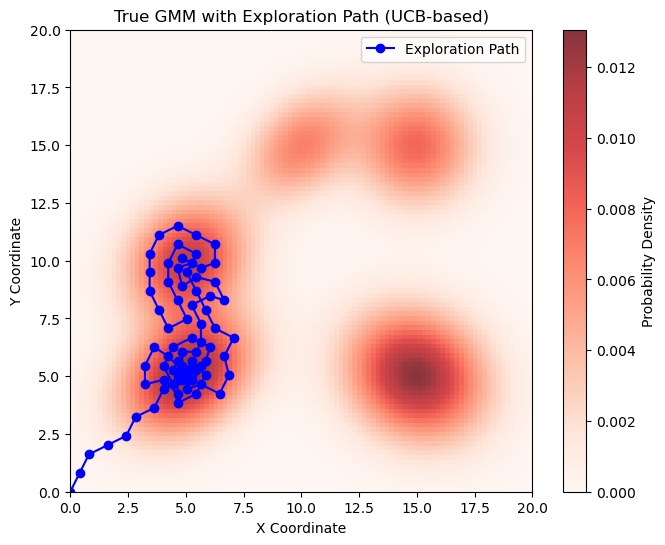

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# 定义 GMM 参数（较大的方差）
means = np.array([[5, 10], [15, 5], [10, 15], [5, 5], [15, 15]])
covariances = [
    [[3, 0.5], [0.5, 3]],
    [[4, -0.5], [-0.5, 3.5]],
    [[2.5, 0.8], [0.8, 2.5]],
    [[3.5, 1], [1, 3]],
    [[3, 0], [0, 3]]
]
weights = [0.2, 0.3, 0.1, 0.25, 0.15]

# 构造高分辨率网格用于可视化
x_grid, y_grid = np.meshgrid(np.linspace(0, 20, 100), np.linspace(0, 20, 100))
grid_points = np.column_stack([x_grid.ravel(), y_grid.ravel()])

# 计算 GMM 在网格上每个点的概率密度
probs = np.zeros(grid_points.shape[0])
for mean, cov, weight in zip(means, covariances, weights):
    rv = multivariate_normal(mean, cov)
    probs += weight * rv.pdf(grid_points)

# 路径选择设置（使用 UCB 指标）
observed_points = []         # 记录探索过程中采样的点
current_point = np.array([0, 0])  # 起始点
max_steps = 80               # 最大步数
max_distance = 1.0           # 每步允许的最大移动距离
exploration_factor = 0.0099     # 探索因子 β

for step in range(max_steps):
    observed_points.append(current_point)
    
    # 计算当前点到所有网格点的距离
    distances = np.linalg.norm(grid_points - current_point, axis=1)
    # 筛选出在 max_distance 范围内的候选点
    candidate_mask = distances <= max_distance
    candidate_points = grid_points[candidate_mask]
    candidate_probs = probs[candidate_mask]
    
    # 如果没有候选点，则结束探索
    if candidate_points.shape[0] == 0:
        break
    
    # 计算每个候选点与所有已采样点的最小距离，作为不确定性度量
    candidate_uncertainty = []
    for cp in candidate_points:
        # 如果还没有观测点（第一步），设定不确定性为 max_distance
        if len(observed_points) == 0:
            candidate_uncertainty.append(max_distance)
        else:
            distances_to_obs = np.linalg.norm(np.array(observed_points) - cp, axis=1)
            candidate_uncertainty.append(np.min(distances_to_obs))
    candidate_uncertainty = np.array(candidate_uncertainty)
    
    # 计算 UCB 指标：UCB = 概率密度值 + exploration_factor * 不确定性
    ucb_values = candidate_probs + exploration_factor * candidate_uncertainty
    
    # 选择 UCB 最高的候选点作为下一步目标
    next_point_idx = np.argmax(ucb_values)
    next_point = candidate_points[next_point_idx]
    current_point = next_point

# 可视化探索路径
plt.figure(figsize=(8, 6))
plt.imshow(probs.reshape(x_grid.shape), extent=(0, 20, 0, 20), origin='lower', cmap='Reds', alpha=0.8)
observed_points = np.array(observed_points)
plt.plot(observed_points[:, 0], observed_points[:, 1], marker='o', color='blue', label='Exploration Path')
plt.title("True GMM with Exploration Path (UCB-based)")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.colorbar(label="Probability Density")
plt.legend()
plt.show()


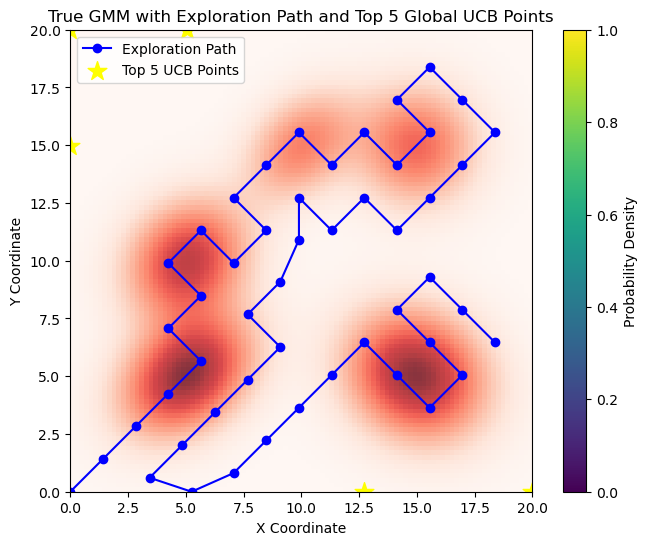

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# 定义 GMM 参数（较大的方差）
means = np.array([[5, 10], [15, 5], [10, 15], [5, 5], [15, 15]])
covariances = [
    [[3, 0.5], [0.5, 3]],
    [[4, -0.5], [-0.5, 3.5]],
    [[2.5, 0.8], [0.8, 2.5]],
    [[3.5, 1], [1, 3]],
    [[3, 0], [0, 3]]
]
weights = [0.2, 0.3, 0.1, 0.25, 0.15]

# 构造高分辨率网格用于可视化
x_grid, y_grid = np.meshgrid(np.linspace(0, 20, 100), np.linspace(0, 20, 100))
grid_points = np.column_stack([x_grid.ravel(), y_grid.ravel()])

# 计算 GMM 在网格上每个点的概率密度
probs = np.zeros(grid_points.shape[0])
for mean, cov, weight in zip(means, covariances, weights):
    rv = multivariate_normal(mean, cov)
    probs += weight * rv.pdf(grid_points)

# 路径选择设置（使用 UCB 指标）
observed_points = []         # 记录探索过程中采样的点
current_point = np.array([0, 0])  # 起始点
max_steps = 50               # 最大步数
max_distance = 2.0           # 每步允许的最大移动距离
exploration_factor = 1  # 探索因子 β

for step in range(max_steps):
    observed_points.append(current_point)
    
    # 计算当前点到所有网格点的距离
    distances = np.linalg.norm(grid_points - current_point, axis=1)
    # 筛选出在 max_distance 范围内的候选点
    candidate_mask = distances <= max_distance
    candidate_points = grid_points[candidate_mask]
    candidate_probs = probs[candidate_mask]
    
    # 如果没有候选点，则结束探索
    if candidate_points.shape[0] == 0:
        break
    
    # 计算每个候选点与所有已采样点的最小距离，作为不确定性度量
    candidate_uncertainty = []
    for cp in candidate_points:
        distances_to_obs = np.linalg.norm(np.array(observed_points) - cp, axis=1)
        candidate_uncertainty.append(np.min(distances_to_obs))
    candidate_uncertainty = np.array(candidate_uncertainty)
    
    # 计算 UCB 指标：UCB = 概率密度值 + exploration_factor * 不确定性
    ucb_values = candidate_probs + exploration_factor * candidate_uncertainty
    
    # 选择 UCB 最高的候选点作为下一步目标
    next_point_idx = np.argmax(ucb_values)
    next_point = candidate_points[next_point_idx]
    current_point = next_point

# 计算全局 UCB 值：对于网格上每个点，其不确定性为该点与所有已采样点的最小距离
observed_points_arr = np.array(observed_points)
# 计算每个网格点到每个观测点的欧氏距离，得到形状 (num_grid_points, num_observed_points)
dists = np.linalg.norm(grid_points[:, None] - observed_points_arr[None, :], axis=2)
min_dists = np.min(dists, axis=1)
ucb_global = probs + exploration_factor * min_dists

# 贪婪选取全局 UCB 最大的 5 个点，且彼此间距离大于 5
sorted_indices = np.argsort(ucb_global)[::-1]  # 降序排序
selected_points = []
for idx in sorted_indices:
    candidate = grid_points[idx]
    if len(selected_points) == 0:
        selected_points.append(candidate)
    else:
        # 检查 candidate 与已选点的距离
        distances_to_selected = np.linalg.norm(np.array(selected_points) - candidate, axis=1)
        if np.all(distances_to_selected > 5):
            selected_points.append(candidate)
    if len(selected_points) >= 5:
        break

selected_points = np.array(selected_points)

# 可视化探索路径和全局 UCB 最大的 5 个点
plt.figure(figsize=(8, 6))
plt.imshow(probs.reshape(x_grid.shape), extent=(0, 20, 0, 20), origin='lower', cmap='Reds', alpha=0.8)
observed_points_arr = np.array(observed_points)
plt.plot(observed_points_arr[:, 0], observed_points_arr[:, 1], marker='o', color='blue', label='Exploration Path')
plt.scatter(selected_points[:, 0], selected_points[:, 1], marker='*', color='yellow', s=200, label='Top 5 UCB Points')
plt.title("True GMM with Exploration Path and Top 5 Global UCB Points")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.colorbar(label="Probability Density")
plt.legend()
plt.show()


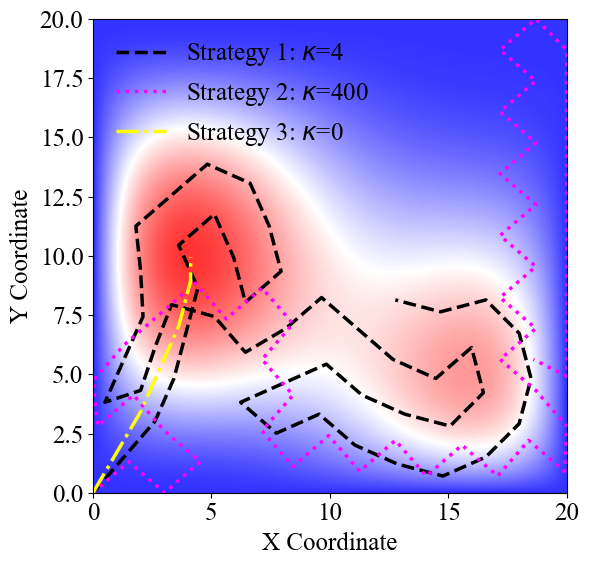

In [97]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import beta

# 设置 IEEE 风格的绘图参数（放大字体，轴标签不加粗）
mpl.rcParams['text.usetex'] = False
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['legend.fontsize'] = 18
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18

# 定义混合 Beta 分布的二维概率密度函数
def mixture_beta_pdf(x, y):
    # 将 x, y 从 [0,20] 映射到 [0,1]
    x_norm = x / 20.0
    y_norm = y / 20.0
    # 定义两个 Beta 分布成分及其权重
    weight1 = 0.6
    weight2 = 0.4
    pdf1 = beta.pdf(x_norm, 2, 5) * beta.pdf(y_norm, 3, 3)
    pdf2 = beta.pdf(x_norm, 5, 2) * beta.pdf(y_norm, 2, 4)
    return weight1 * pdf1 + weight2 * pdf2

# 构造高分辨率网格用于可视化
x_grid, y_grid = np.meshgrid(np.linspace(0, 20, 200), np.linspace(0, 20, 200))
grid_points = np.column_stack([x_grid.ravel(), y_grid.ravel()])

# 计算混合 Beta 分布在网格上每个点的概率密度
probs = mixture_beta_pdf(grid_points[:, 0], grid_points[:, 1])

# 定义探索路径模拟函数，基于 UCB 指标
def simulate_path(aa, exploration_factor, max_steps=50, max_distance=2.0):
    observed_points = []          # 记录探索过程中采样的点
    current_point = np.array([0, 0])   # 起始点
    for step in range(max_steps):
        observed_points.append(current_point)
        
        # 计算当前点到所有网格点的距离
        distances = np.linalg.norm(grid_points - current_point, axis=1)
        # 筛选出在 max_distance 范围内的候选点
        candidate_mask = distances <= max_distance
        candidate_points = grid_points[candidate_mask]
        candidate_probs = probs[candidate_mask]
        
        # 如果候选点为空，则结束探索
        if candidate_points.shape[0] == 0:
            break
        
        # 计算每个候选点与所有已采样点的最小距离，作为不确定性度量
        candidate_uncertainty = []
        for cp in candidate_points:
            distances_to_obs = np.linalg.norm(np.array(observed_points) - cp, axis=1)
            candidate_uncertainty.append(np.min(distances_to_obs))
        candidate_uncertainty = np.array(candidate_uncertainty)
        
        # 计算 UCB 指标：UCB = aa * 概率密度值 + exploration_factor * 不确定性
        ucb_values = candidate_probs * aa + exploration_factor * candidate_uncertainty
        
        # 选择 UCB 指标最高的候选点作为下一步目标
        next_point_idx = np.argmax(ucb_values)
        next_point = candidate_points[next_point_idx]
        current_point = next_point
    return np.array(observed_points)

# 分别模拟三种策略的探索路径
path1 = simulate_path(aa=1.0, exploration_factor=4)   # 同时考虑概率密度与不确定性
path2 = simulate_path(aa=0.0, exploration_factor=4)   # 仅依靠不确定性
path3 = simulate_path(aa=1.0, exploration_factor=0)   # 仅依靠概率密度

# IEEE 格式的可视化：采用 bwr colormap（蓝-红），并使用不同线型和颜色突出显示路径
plt.figure(figsize=(8, 6))
plt.imshow(probs.reshape(x_grid.shape), extent=(0, 20, 0, 20), origin='lower', cmap='bwr', alpha=0.8)
plt.plot(path1[:, 0], path1[:, 1], linestyle='--', color='black', linewidth=2.5, label='Strategy 1: $\kappa$=4')
plt.plot(path2[:, 0], path2[:, 1], linestyle=':', color='magenta', linewidth=2.5, label='Strategy 2: $\kappa$=400')
plt.plot(path3[:, 0], path3[:, 1], linestyle='-.', color='yellow', linewidth=2.5, label='Strategy 3: $\kappa$=0')
# plt.title('Exploration Paths under Different Strategies', weight='bold')
plt.xlabel('X Coordinate')  # 轴标签不加粗
plt.ylabel('Y Coordinate')  # 轴标签不加粗
# cbar = plt.colorbar(label='Probability Density')
plt.legend(loc='best', frameon=False)
plt.tight_layout()
#save with dpi and tight layout
plt.savefig('exploration_paths.png', dpi=300)
plt.show()
